# Snippets

In [27]:
import numpy as np
from scipy.linalg import eigh
from scipy.spatial.distance import squareform, pdist

import pandas as pd
from matplotlib.pyplot import plot, scatter
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import adjusted_mutual_info_score, accuracy_score, v_measure_score, normalized_mutual_info_score


In [499]:
n = 10
max_d = 3
c = 2
X = list()
y = list()
# 1D, 2D, 3D with 2 clusters each; other dimensions uniform rnd noise
for i in range(1, max_d+1):
    d = i
    # Generate Gaussian clusters
    Xi, yi = make_blobs(n_samples=n, n_features=d, centers=c)
    # Unif. rnd. noise in other features
    Xi_rnd = np.random.rand(n, max_d-i) * 100
    Xi = np.block([Xi, Xi_rnd])
    X.append(Xi)
    # Make sure labels are not accidentally overlapping
    y.append(yi + (i-1)*c)
    del Xi, yi, Xi_rnd
# Combine dataset and labels
X = np.block([[x] for x in X])
y = np.block(y)
df = pd.DataFrame(X, columns=[f'x{x}' for x in range(d)])
X_df = df.copy()
Xy_df = df.copy()
Xy_df['y'] = y
Xy_df

,x0,x1,x2,y
0,-6.940449,61.644470,43.734311,1
1,8.639196,73.650527,54.081836,0
2,-7.191211,48.543803,7.896212,1
3,9.543214,26.170311,9.340324,0
4,7.520675,62.295659,8.628119,0
5,-6.654035,11.742944,42.478548,1
6,-6.524243,72.355014,32.947168,1
7,-6.231856,99.654588,25.474788,1
8,7.074440,93.166959,6.345214,0
9,8.403532,39.652070,88.381855,0


In [2]:
n = 30
d = 3
c = 3
# Generate Gaussian clusters
X, y = make_blobs(n_samples=n, n_features=d, centers=c, random_state=4567)
min_ = X[:, 0:2].min()
max_ = X[:, 0:2].max()
X[:, 2] = np.random.uniform(min_, max_, n) # Overwrite with unif. noise
df = pd.DataFrame(X, columns=[f'x{x}' for x in range(d)])
X_df = df.copy()
Xy_df = df.copy()
Xy_df['y'] = y
Xy_df

,x0,x1,x2,y
0,-4.168972,7.065823,5.427426,0
1,3.757965,3.534118,2.723186,1
2,4.837864,5.375200,11.062379,1
3,-5.360326,-8.339278,-5.491321,2
4,4.746178,4.901582,0.197164,1
5,-3.262072,8.574693,-7.734251,0
6,-2.039195,8.460495,2.250424,0
7,-2.308428,10.956164,7.056698,0
8,4.450231,2.086493,-5.852956,1
9,-4.514163,-7.289729,5.334922,2


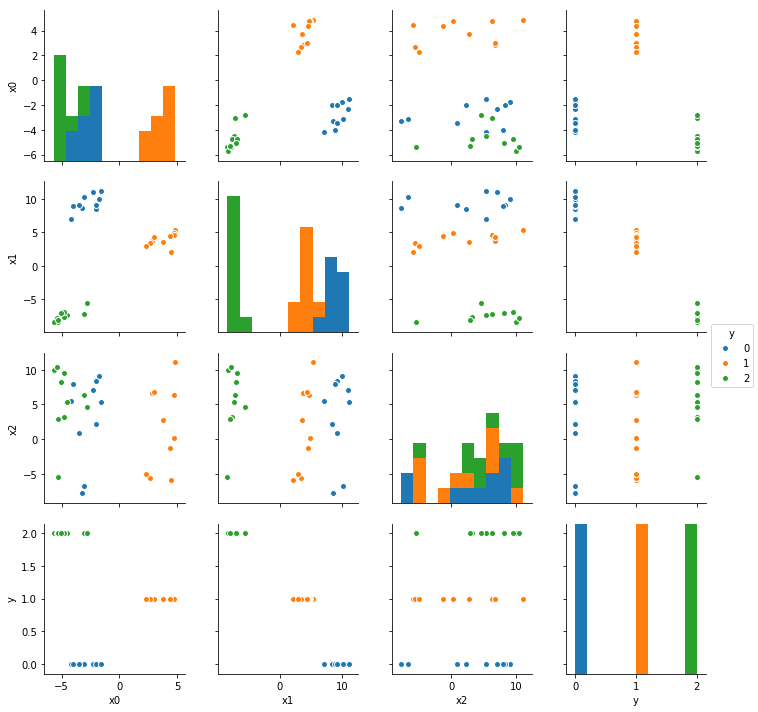

In [3]:
sns.pairplot(Xy_df, hue='y');

## COPAC

In [4]:
from copac import COPAC

In [28]:
eucl_dist = squareform(pdist(X, metric='euclidean'))
eucl_dist.mean(axis=0)
#eucl_dist

array([ 10.53721643,  10.15729213,  13.13353573,  16.45280327,
        11.09329464,  15.1957106 ,  10.56692654,  12.15086894,
        13.50803993,  12.35501704,  12.69353475,  12.27114781,
        10.97911555,  10.18027929,  11.32861604,  11.54178318,
        15.18157676,  10.27741463,  12.7257477 ,  14.44964121,
        12.25140859,  13.18374478,  11.90516802,  11.26000761,
        14.27331098,  11.71819764,  12.29734732,  11.40267045,
        13.07812006,  12.87437504])

[ 0  0  3 -1  0  0  0  0  1  2  2  0  3  3  0  0  0  3  1  2  2  2  0  2  2
  0  1  0  2  2]
[0 1 1 2 1 0 0 0 1 2 2 0 1 1 1 0 0 1 1 2 2 2 0 2 2 0 1 0 2 2]
AMI 0.598439196731
NMI 0.713634197876
V   0.7102375803


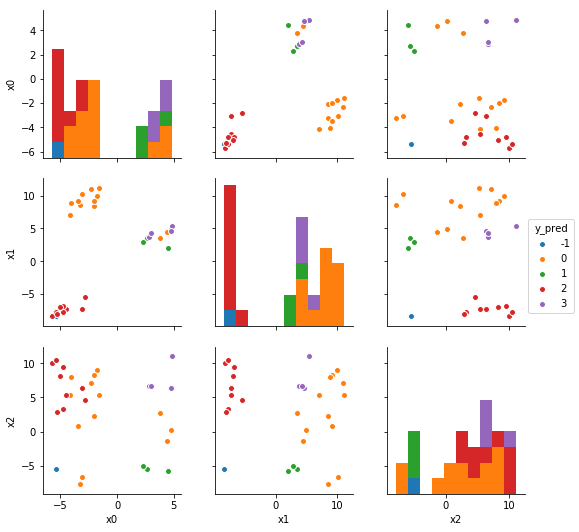

In [31]:
clst = COPAC(k=12, mu=2, eps=3, algorithm='brute')
y_pred = clst.fit_predict(X)
print(y_pred)
print(y)
print('AMI', adjusted_mutual_info_score(y, y_pred))
print('NMI', normalized_mutual_info_score(y, y_pred))
print('V  ', v_measure_score(y, y_pred))
Xy_df['y_pred'] = y_pred
sns.pairplot(Xy_df, x_vars=['x0', 'x1', 'x2'], y_vars=['x0', 'x1', 'x2'], hue='y_pred');